<a href="https://colab.research.google.com/github/Sirayus/colab-notebook/blob/main/eda_netflix_shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d shivamb/netflix-shows	# copy from dataset you want to use

!ls

Saving kaggle.json to kaggle.json
  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 39.6MB/s]
kaggle.json  netflix-shows.zip	sample_data


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("netflix-shows.zip", "r") # Don't forget to change file name to zip
zip_ref.extractall("files")
zip_ref.close()

In [5]:
nf = pd.read_csv('/content/files/netflix_titles.csv', parse_dates=['date_added'])

### Explore

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [7]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
def keyword(kw, col):
    tmp = nf[nf[col].str.contains(kw).fillna(False)]
    tmp['date_added'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.show()
    tmp['date_added'].dt.month.value_counts().sort_index().plot(kind='bar')
    plt.show()
    tmp['date_added'].dt.isocalendar().week.value_counts().sort_index().plot(kind='bar', figsize=(10,5))
    plt.show()
    tmp['date_added'].dt.dayofweek.value_counts().sort_index().plot(kind='bar')
    plt.show()
    tmp['date_added'].dt.day.value_counts().sort_index().plot(kind='bar')
    plt.show()

### Hypothesis : Content on Netflix got released more on Friday

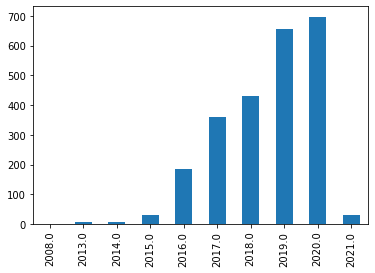

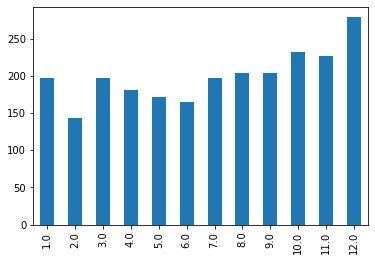

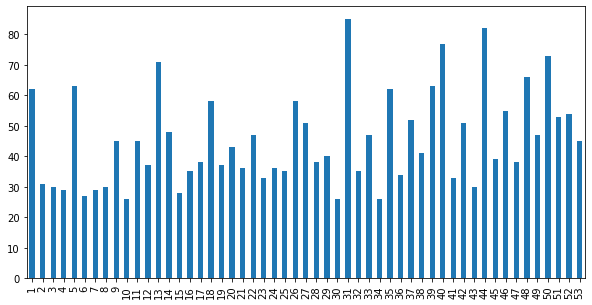

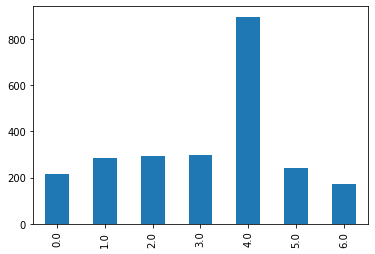

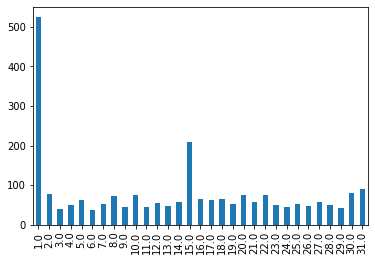

In [9]:
keyword('TV Show', 'type')

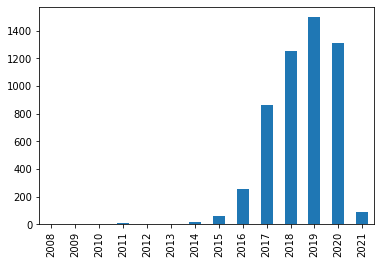

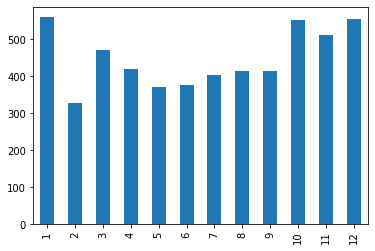

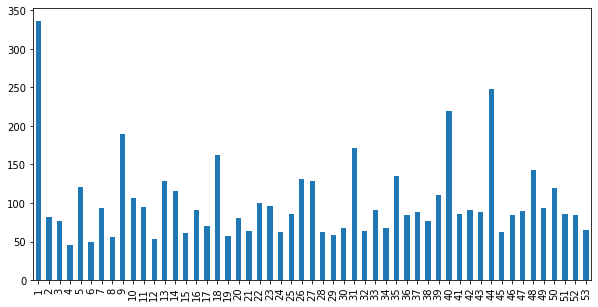

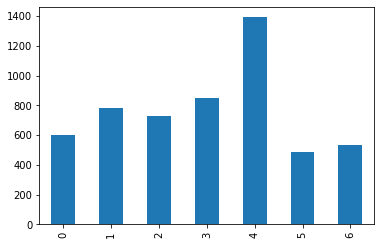

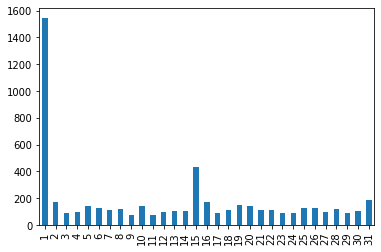

In [10]:
keyword('Movie', 'type')

### Hypothesis : Horror movies got released more on October

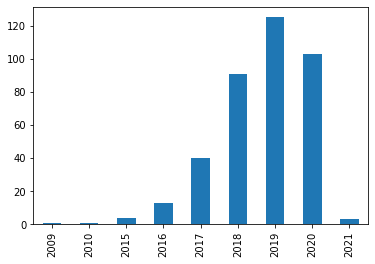

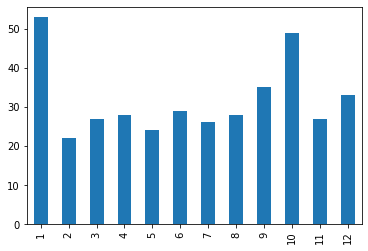

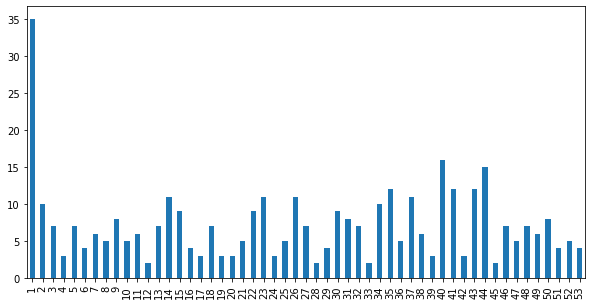

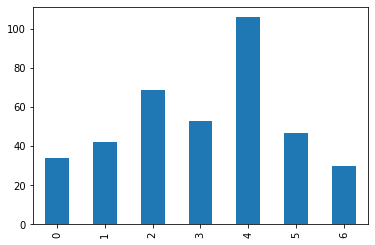

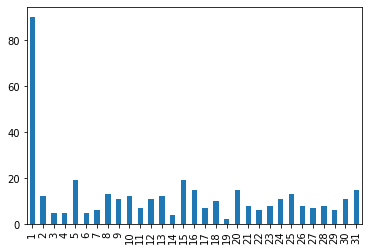

In [11]:
keyword('Horror', 'listed_in')

### Hypothesis : Christmas movies got released more on December

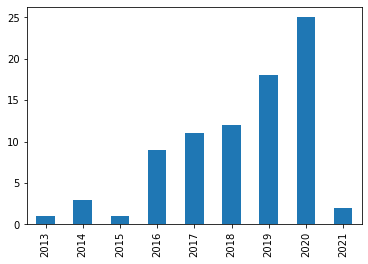

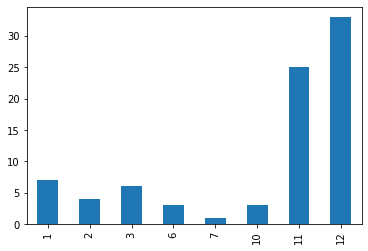

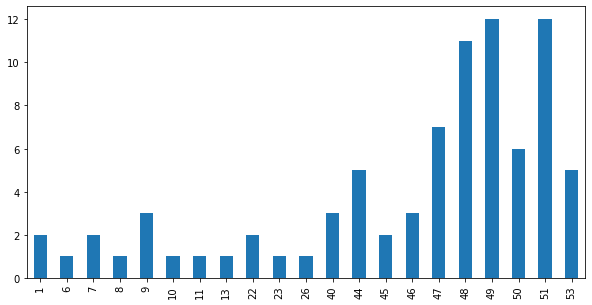

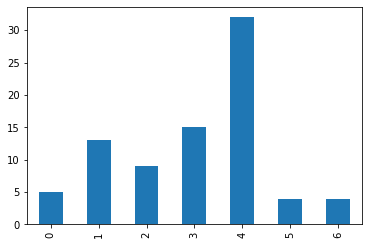

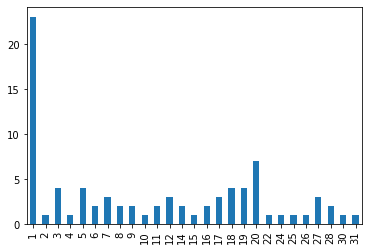

In [12]:
keyword('[Cc]hristmas', 'description')